# Introduction to Quantum Optics

In [46]:
%pip install qutip
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

                                              0.0/313.2 kB ? eta -:--:--
     -                                        10.2/313.2 kB ? eta -:--:--
     ---                                   30.7/313.2 kB 325.1 kB/s eta 0:00:01
     --------                              71.7/313.2 kB 563.7 kB/s eta 0:00:01
     -------------------------------------- 313.2/313.2 kB 1.9 MB/s eta 0:00:00
                                              0.0/22.6 MB ? eta -:--:--
                                              0.5/22.6 MB 16.2 MB/s eta 0:00:02
     -                                        0.9/22.6 MB 11.9 MB/s eta 0:00:02
     --                                       1.5/22.6 MB 11.8 MB/s eta 0:00:02
     ---                                      2.0/22.6 MB 12.5 MB/s eta 0:00:02
     ----                                     2.4/22.6 MB 11.8 MB/s eta 0:00:02
     ---

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import qutip as qt


from IPython.display import HTML

## Example: Photons in a cavity

What is a photon and how do we think about it? We can start with a cavity. Below is a *nanobeam cavity*. It is essentially a beam of a material with a high index of refraction surrounded by air. The light travels through the beam. There are three groups of holes. Each group of holes acts like a mirror. The space in between the two mirrors is a cavity. Light reflects from the first mirror but some of it leaks into the cavity. The light that leaks into the cavity gets trapped and stays for a long time until it leaks out of the sides. 

<img src="cav_sim.png" width="300" height="200" />

In [20]:
# Frequency domain cavity resonance measurement
HTML("""
    <video width="320" height="240" controls>
        <source src="https://raw.githubusercontent.com/christianlange196/qsap-2023/main/dev1-2-iim3.mp4" type="video/mp4">
    </video>
""")

### 1. A quantum state

The quantum state of the cavity can have 0 photons, 1 photons, 2 photons, etc. Because we cannot simulate infinitely many photons, we cut off the number photons at some point, call it $N$. These states form our *basis*. 

$$
\left| \psi \right\rangle = \left| 0 \right>, \left| 1 \right>, \cdots \left| N \right> 
$$

In [21]:
# The quantum state of a cavity with up to N photons
# There are 11 total states: 0, 1, 2, ..., 10
N = 11

# We can put psi0 in the state of the cavity with 10 photons
psi0 = qt.basis(N, 10)

### 2. A Hamiltonian

The Hamiltonian is the energy of the system. The energy of this system is simply the number of photons in the cavity. Even if there are zero photons, there is also some energy in the vacuum, called the *zero point energy*.

$$
H = \hbar \omega_0 \left( \hat{n} + \frac{1}{2} \right) 
$$

Here, $\hat{n}$ is the number operator, which counts the number of photons. 

In [22]:
# Define the Hamiltonian
# Note that we have set hbar = 1 and omega = 1
H = qt.num(N) + 1/2

### 3. Dissipation

No quantum system lasts forever&mdash;they all decay. The cavity leaks both into the waveguide and into free space. We can represent this with *collapse operators*. The following collapse operator $\mathcal{C}$ represents the loss of a photon at a rate of $\kappa$. 

$$
\mathcal{C} = \sqrt{\kappa} \hat{a}
$$

Here, $\hat{a}$ is the annihilation operator, which removes a photon from the cavity.

In [23]:
# Define the collapse operators
# Kappa is the decay rate of the cavity
# c_ops is a list of collapse operators
# qt.destroy(N) destroys a single photon
kappa = 0.5
a = qt.destroy(N)
c_ops = [np.sqrt(kappa) * a]

### 4. Time evolution

We will evolve the system using the *Monte-Carlo* solver. This solver uses the Hamiltonian to evolve the system, and allows it to collapse at random times according to the collapse operators. The more *trajectories* we use, the more accurate the simulation will be.

In [24]:
# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res1 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=1)
res2 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=10)
res3 = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=100)

Total run time:   0.01s


10.0%. Run time:   3.19s. Est. time left: 00:00:00:28
20.0%. Run time:   3.20s. Est. time left: 00:00:00:12
30.0%. Run time:   3.20s. Est. time left: 00:00:00:07
40.0%. Run time:   3.20s. Est. time left: 00:00:00:04
50.0%. Run time:   3.21s. Est. time left: 00:00:00:03
60.0%. Run time:   3.30s. Est. time left: 00:00:00:02
70.0%. Run time:   3.31s. Est. time left: 00:00:00:01
80.0%. Run time:   3.32s. Est. time left: 00:00:00:00
90.0%. Run time:   3.32s. Est. time left: 00:00:00:00
100.0%. Run time:   3.35s. Est. time left: 00:00:00:00
Total run time:   3.42s
10.0%. Run time:   3.42s. Est. time left: 00:00:00:30
20.0%. Run time:   3.47s. Est. time left: 00:00:00:13
30.0%. Run time:   3.51s. Est. time left: 00:00:00:08
40.0%. Run time:   3.54s. Est. time left: 00:00:00:05
50.0%. Run time:   3.57s. Est. time left: 00:00:00:03
60.0%. Run time:   3.60s. Est. time left: 00:00:00:02
70.0%. Run time:   3.63s. Est. time left: 00:00:00:01
80.0%. Run time:   3.67s. Est. time left: 00:00:00:00
90.

### 5. Plot the results!

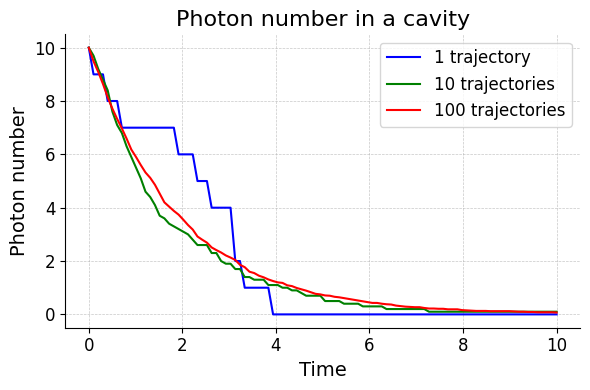

In [25]:
import matplotlib.pyplot as plt

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figure size for better visibility

# Plotting with different colors and line styles
ax.plot(t, res1.expect[0], color='blue', linestyle='-', label='1 trajectory')
ax.plot(t, res2.expect[0], color='green', linestyle='-', label='10 trajectories')
ax.plot(t, res3.expect[0], color='red', linestyle='-', label='100 trajectories')

# Setting labels, title, and legend with increased font sizes
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Photon number', fontsize=14)
ax.set_title('Photon number in a cavity', fontsize=16)

# These make it more beautiful
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', which='both', linewidth=0.5, alpha=0.7)
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()  # Adjust layout to prevent overlap


#### Classical simulation

In this classical simulation (using MEEP in Python), I used a pulse of light to populate a cavity. You can watch as it decays. 

In [26]:
# Time-domain classical simulation of cavity decay
HTML("""
    <video width="320" height="240" controls>
        <source src="https://raw.githubusercontent.com/christianlange196/qsap-2023/main/cavity_res.mp4" type="video/mp4">
    </video>
""")

## A driven cavity

### The Hamiltonian

We can drive the cavity with a term that creates photons at a certain rate $\Omega a^\dagger$. The rate is called the *Rabi frequency*. 

$$
H_D = \hbar \Omega \left( a^\dagger + a \right)
$$

10.0%. Run time:   3.66s. Est. time left: 00:00:00:32
20.0%. Run time:   3.98s. Est. time left: 00:00:00:15
30.0%. Run time:   4.26s. Est. time left: 00:00:00:09
40.0%. Run time:   4.53s. Est. time left: 00:00:00:06
50.0%. Run time:   4.81s. Est. time left: 00:00:00:04
60.0%. Run time:   5.12s. Est. time left: 00:00:00:03
70.0%. Run time:   5.38s. Est. time left: 00:00:00:02
80.0%. Run time:   5.65s. Est. time left: 00:00:00:01
90.0%. Run time:   5.94s. Est. time left: 00:00:00:00
100.0%. Run time:   6.18s. Est. time left: 00:00:00:00
Total run time:   6.25s


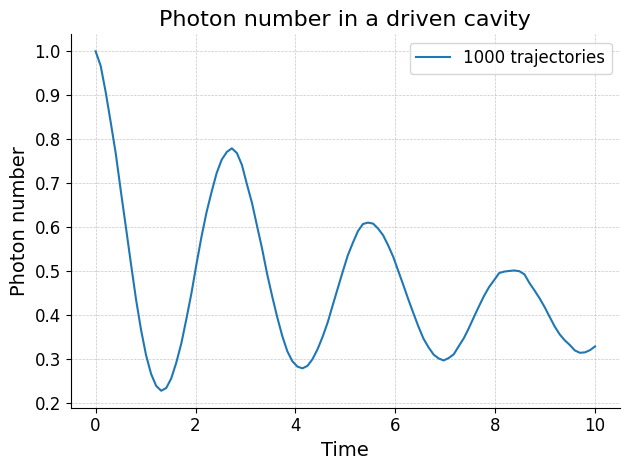

In [31]:
# Define the Hamiltonian
N = 1 + 1  # number of photon states
Omega = 1  # Rabi frequency
H_0 = qt.num(N) + 1/2
H_D = Omega* (qt.destroy(N) + qt.create(N))
H = H_0 + H_D

gamma = 0.25  # decay rate
c_ops = [np.sqrt(gamma) * qt.destroy(N)]

# Define the initial state
psi0 = qt.basis(N, N - 1)

# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res = qt.mcsolve(H, psi0, t, c_ops, [qt.num(N)], ntraj=1000)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res.expect[0], label='1000 trajectories')

# Setting labels, title, and legend with increased font sizes
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Photon number', fontsize=14)
ax.set_title('Photon number in a driven cavity', fontsize=16)

# These make it more beautiful
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', which='both', linewidth=0.5, alpha=0.7)
ax.spines['top'].set_visible(False)  # Hide the top spine
ax.spines['right'].set_visible(False)  # Hide the right spine
ax.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()  # Adjust layout to prevent overlap

## Example: An atom

### A decaying atom

Below is an experimental measurement of a molecule's dipole moment decaying with time

<img src="decay_exp.png" width="300" height="200" />

### The Hamiltonian for an atom

The $\sigma_z$ operator gives the atom's dipole moment. It gives $+1$ for an atom in the excited state and $-1$ for an atom in the ground state. 

$$
H = \hbar \omega_0 \sigma_z
$$

10.0%. Run time:   4.05s. Est. time left: 00:00:00:36
20.0%. Run time:   4.30s. Est. time left: 00:00:00:17
30.0%. Run time:   4.58s. Est. time left: 00:00:00:10
40.0%. Run time:   5.16s. Est. time left: 00:00:00:07
50.0%. Run time:   5.41s. Est. time left: 00:00:00:05
60.0%. Run time:   5.67s. Est. time left: 00:00:00:03
70.0%. Run time:   5.94s. Est. time left: 00:00:00:02
80.0%. Run time:   6.21s. Est. time left: 00:00:00:01
90.0%. Run time:   6.47s. Est. time left: 00:00:00:00
100.0%. Run time:   6.71s. Est. time left: 00:00:00:00
Total run time:   6.77s


Text(0.5, 1.0, 'Excitation probability of an atom')

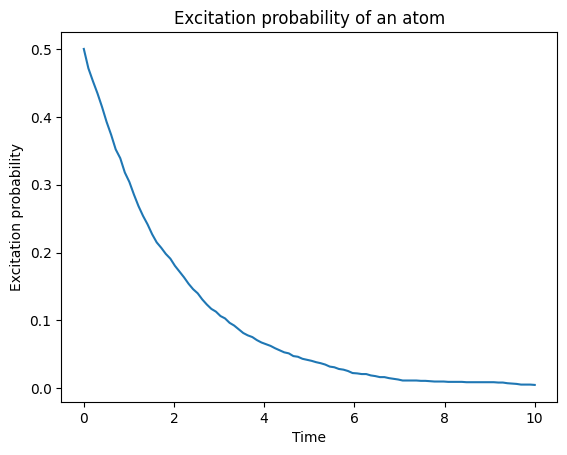

In [85]:
# Define the Hamiltonian
H = qt.sigmap() * qt.sigmam() / 2

# Define the decay
gamma = .5  # decay rate

# Define the initial state
psi0 = qt.basis(2, 0)  # excited state

# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res = qt.mcsolve(H, psi0, t, [np.sqrt(gamma) * qt.sigmam()], [H], ntraj=1000)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res.expect[0], label='100 trajectory')
ax.set_xlabel('Time')
ax.set_ylabel('Excitation probability')
ax.set_title('Excitation probability of an atom')

In [83]:
# Visualization function
def visualize_atom(t, res):
    omega = 0.5

    cart2th = lambda x, y : np.arctan2(y, x)
    cart2r = lambda x, y : np.sqrt(x**2 + y**2)

    E_th = lambda r, theta, tau : np.sin(theta) * np.exp(1j * r - 1j * omega * tau) * (1/r**3 - 1j/r**2 - 1/r)
    E_r = lambda r, theta, tau : np.cos(theta) * np.exp(1j * r - 1j * omega * tau) * (2/r**3 - 2j/r**2)
    def E_tot(x,y, tau):
        r = cart2r(x,y)
        theta = cart2th(x,y)
        field = np.real(E_r(r, theta, tau) + E_r(r, theta, tau))
        field[r<2.] = 0
        return field.transpose()

    N = 100
    d = 15
    x = np.linspace(-d, d, N)
    y = np.linspace(-d, d ,N)
    X, Y = np.meshgrid(x, y)


    fig, ax = plt.subplots()
    cax = ax.imshow(E_tot(X,Y, 100), cmap='RdBu_r', animated=True)
    plt.close()

    def update(frame):
        cax.set_array(E_tot(X, Y, frame) * res.expect[0][frame])  # Update the phase based on the frame
        return cax,

    ani = FuncAnimation(fig, update, frames=len(t), blit=True, interval=1000/20)  # 20 fps

    return ani

In [86]:
animation = visualize_atom(t, res)
HTML(animation.to_jshtml())

## The Jaynes-Cummings Hamiltonian

### The Hamiltonian
If we want to put an atom *inside* of a cavity, all we have to do is make a term that takes a photon from the atom and gives it to the cavity and vice versa. This looks like $a^\dagger \sigma_-$ and $a \sigma_+$. Oure atom-cavity Hamiltonian is $H_{AF} = \hbar g \left( a^\dagger \sigma_- + a \sigma_+ \right)$.

$$
H = \hbar \omega_0 \left( \hat{n} + \frac{1}{2} \right) + \hbar \Omega \left( a^\dagger + a \right) + \hbar g \left( a^\dagger \sigma_- + a \sigma_+ \right)
$$

10.0%. Run time:   3.74s. Est. time left: 00:00:00:33
20.0%. Run time:   4.20s. Est. time left: 00:00:00:16
30.0%. Run time:   4.64s. Est. time left: 00:00:00:10
40.0%. Run time:   5.11s. Est. time left: 00:00:00:07
50.0%. Run time:   5.53s. Est. time left: 00:00:00:05
60.0%. Run time:   5.99s. Est. time left: 00:00:00:03
70.0%. Run time:   6.58s. Est. time left: 00:00:00:02
80.0%. Run time:   7.02s. Est. time left: 00:00:00:01
90.0%. Run time:   7.57s. Est. time left: 00:00:00:00
100.0%. Run time:   8.10s. Est. time left: 00:00:00:00
Total run time:   8.18s


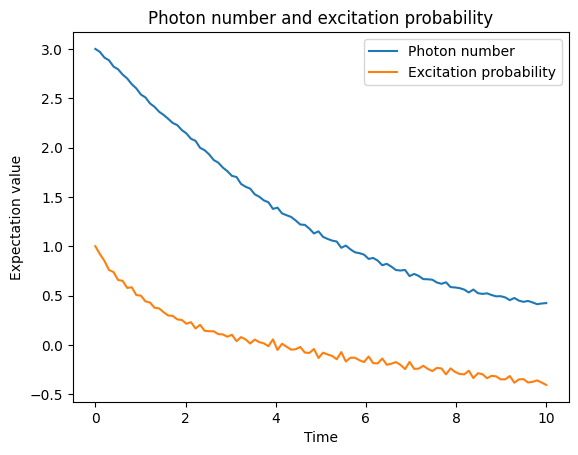

In [29]:
# Define the operators 
N = 3 + 1  # number of photon states
a = qt.tensor(qt.destroy(N), qt.qeye(2))
n = a.dag() * a
sm = qt.tensor(qt.qeye(N), qt.sigmam())
sz = qt.tensor(qt.qeye(N), qt.sigmaz())

# Define the coupling strengths
g = 10
Omega = 1

# Define the Hamiltonian
H_0 = n + 1/2
H_A = Omega * sm.dag() * sm
H_AF = g * (a.dag() * sm + a * sm.dag())
H = H_0 + H_A + H_AF

# Define the decay
gamma = 0.25  # decay rate
c_ops = [np.sqrt(gamma) * a]

# Define the initial state
psi0 = qt.tensor(qt.basis(N, N - 1), qt.basis(2, 0))

# Define the time vector
t = np.linspace(0, 10, 100)

# Solve with monte carlo
res1 = qt.mcsolve(H, psi0, t, c_ops, [a.dag() * a, sz], ntraj=1000)

# Plot the results
fig, ax = plt.subplots()
ax.plot(t, res1.expect[0], label='Photon number')
ax.plot(t, res1.expect[1], label='Excitation probability')
ax.set_xlabel('Time')
ax.set_ylabel('Expectation value')
ax.set_title('Photon number and excitation probability')
ax.legend()


# Appendix 

## Formalism of quantum optics 

The formalism of quantum optics is very intuitive. Everything is written in terms of matrices. The Hamiltonian $\hat{H}$ is matrix that acts as the *energy* operator. The Hamiltonian tells you about the time evolution of the system via the *Schr&ouml;dinger equation*. 

$$
\hat{H} \left| \psi \right> = -\frac{\partial}{\partial t} \left| \psi \right>
$$

Here, E is the energy. Note that $\hat{H}$ is a matrix, $\left| \psi \right>$ is a vector (actually, it's a ray, but they're pretty much the same), and $E$ is a number. The solution to this gives you a wavefunction $\left| \psi \right>$ with some time evolution and energy. 